## Modelling stock prices using Brownian motion based on the normal distribution

A geometric Brownian motion (GBM), also known as an exponential Brownian motion, is a continuous-time stochastic process in which the logarithm of the randomly varying quantity follows a Brownian motion with drift. It is an important example of stochastic processes satisfying a stochastic differential equation (SDE); in particular, it is used in mathematical finance to model stock prices in the Black–Scholes model.

### Stochastical differential equation

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$ d S_t = \mu S_t dt + \sigma S_t d W_t $

where $W_t$ is a Wiener process or Brownian motion, and $\mu$ ('the percentage drift') and $\sigma$ ('the percentage volatility') are constants.

The former parameter is used to model deterministic trends, while the latter parameter models unpredictable events occurring during the motion.


### Solution

For an arbitrary initial value $S_0$ the above SDE has the analytic solution (under Itô calculus | Itô's interpretation):

$S_t = S_0\exp\left( \left(\mu - \frac{\sigma^2}{2} \right)t + \sigma W_t\right).$

The derivation requires the use of Itô calculus. Applying Itô's formula leads to

 $d(\log S_t) =  (\log S_t)'  d S_t + \frac{1}{2} (\log S_t)'' \,dS_t \,dS_t
= \frac{d S_t}{S_t} -\frac{1}{2} \,\frac{1}{S_t^2} \, dS_t \, dS_t $

where $dS_t \, dS_t$ is the quadratic variation of the SDE. 

$ d S_t \, d S_t \, = \, \sigma^2 \, S_t^2 \, d W_t^2 + 2 \sigma S_t^2 \mu \, d W_t \, d t + \mu^2 S_t^2 \, d t^2 $

When $d t \to 0 $, $d t$ converges to 0 faster than $d W_t$, 
since $d W_t^2 = O(d t) $. So the above infinitesimal can be simplified by 

$ d S_t \, d S_t \, = \, \sigma^2 \, S_t^2 \, dt $

Plugging the value of $dS_t$ in the above equation and simplifying we obtain

$\log \frac{S_t}{S_0} = \left(\mu -\frac{\sigma^2}{2}\,\right) t + \sigma W_t\,.$

Taking the exponential and multiplying both sides by $S_0$ gives the solution claimed above.


### Estimation of $\mu$ and $\sigma$

From model,  we have

\begin{align*}
\log{S_t} &= \log{S_0} + (\mu - \frac{\sigma^2}{2}) t + \sigma W_t \\

\log{S_{t-1}} &= \log{S_0} + (\mu - \frac{\sigma^2}{2}) (t-1) + \sigma W_{t-1} \\

\log{S_t} - \log{S_{t-1}} &= (\mu - \frac{\sigma^2}{2}) + \sigma(W_t - W_{t-1}) 
\end{align*}

calculate expection and variance
\begin{align*}
    E[\log{S_t} - \log{S_{t-1}}] &= (\mu - \frac{\sigma^2}{2}) + \sigma E[W_t - W_{t-1}] \\
    &= (\mu - \frac{\sigma^2}{2}) + \sigma * 0 \\
    &= (\mu - \frac{\sigma^2}{2})
\end{align*}

\begin{align*}
Var[\log{S_t} - \log{S_{t-1}}] &= Var[(\mu - \frac{\sigma^2}{2}) + \sigma (W_t - W_{t-1})] \\
&= \sigma^2 Var[W_t - W_{t-1}] \\
&= \sigma^2 
\end{align*}

Then $ \log{S_t} - \log{S_{t-1}} \sim N(\mu - \frac{\sigma^2}{2}, \sigma) $.

If we have samples S, we can use $\log{S_t} - \log{S_{t-1}}$ for t=1, 2, 3, 4, ..., to estimate $\mu$ and $\sigma$.


Let's interpret $ \log{S_t} - \log{S_{t-1}}$.
\begin{align*}
\log{S_t} - \log{S_{t-1}} &= \log{(1 + ( \frac{S_t}{S_{t-1}} -1))} \\
&= \log({1 + \frac{S_t-S_{t-1}}{S_{t-1}}}) \\
&= 0 + \frac{S_t-S_{t-1}}{S_{t-1}} + o(\frac{S_t-S_{t-1}}{S_{t-1}}) \\
&\approx \frac{S_t-S_{t-1}}{S_{t-1}}
\end{align*}

take $S_t-S_{t-1}$ as earning, $S_{t-1}$ as an invest, then $\frac{S_t-S_{t-1}}{S_{t-1}}$ can be interpreted as relative return.

In [78]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Use case: Cisco stock price in 2025

We use Cisco stock price in 2025, estimate $\mu$ and $\sigma$ to run the model

In [ ]:
class DriftBrownianMotionSimulator:
    def __init__(self, mu, sigma, n_steps):
        self.mu = mu
        self.sigma = sigma
        self.n_steps = n_steps

    def simulate(self, X0, T=1, dt=1, n_paths=1):
        """
        Simulate paths using Euler-Maruyama method
        
        Parameters:
        - X0: initial value
        - T: time horizon
        - dt: time step
        - n_paths: number of simulation paths
        
        Returns:
        - t: time grid
        - X: simulated paths (n_paths x n_steps)
        """

        print(f"n_steps: {type(n_steps)}")
        t = np.linspace(0, T, self.n_steps + 1)
        X = np.zeros((n_paths, self.n_steps + 1))

        X[:, 0] = X0
        for i in range(n_steps):
            # Brownian motion increment
            dW = np.random.normal(0, np.sqrt(dt), n_paths) 

            brownian_motion = self.sigma * np.multiply(X[:, i], dW )
            drift = self.mu * dt * X[:, i]

            X[:, i+1] = X[:, i] + drift + brownian_motion

        return t, X


In [81]:
# read the data
df = pd.read_csv("data/HistoricalData_Cisco_2025.csv")
df = df[::-1].reset_index(drop=True)  # reverse df according to date increase
prices_2025 = df['Close/Last']

df['price'] = df['Close/Last']
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)
df['price_ratio'] = df['price'] / df['price'].shift(1)
df['log_return'] = np.log(df['price_ratio'])

mean = df['log_return'].mean()
var = df['log_return'].var()

sigma = math.sqrt(var)
mu = mean + var/2

# steps
n_steps = df['price'].size


### Predicted price

In [ ]:
# Create model
model = DriftBrownianMotionSimulator(mu, sigma, n_steps)

# Simulate
n_paths = 1
dt = 1
T = 1
S0 = df['price'][0]

t, St = model.simulate(S0, T, dt, n_paths)

plt.plot(t, St.T)
plt.xlabel("Years $(t)$")
plt.ylabel("predicted price")
plt.title(
    "Predicted Price $S_t$"
)

### Historical price

In [ ]:
plt.plot(t[0:n_steps], df['price'])
plt.xlabel("Years $(t)$")
plt.ylabel("log_return")
plt.title(
    "Price $S_t$"
)

### Log return

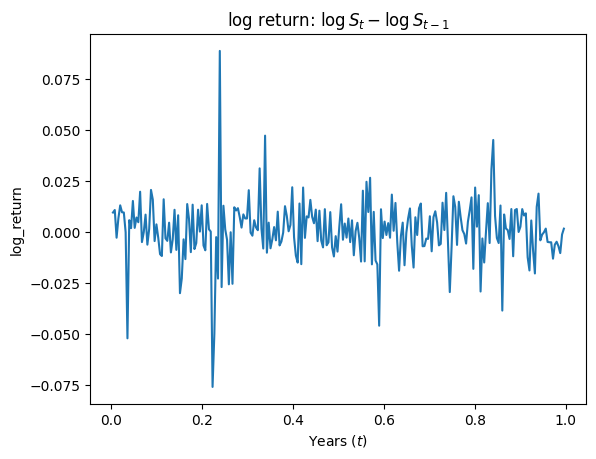

In [84]:
plt.plot(t[0:n_steps], df['log_return'])
plt.xlabel("Years $(t)$")
plt.ylabel("log_return")
plt.title(
    "log return: $\log {S_t} - \log {S_{t-1}}$"
)
plt.show()

### Compare price to predicted price

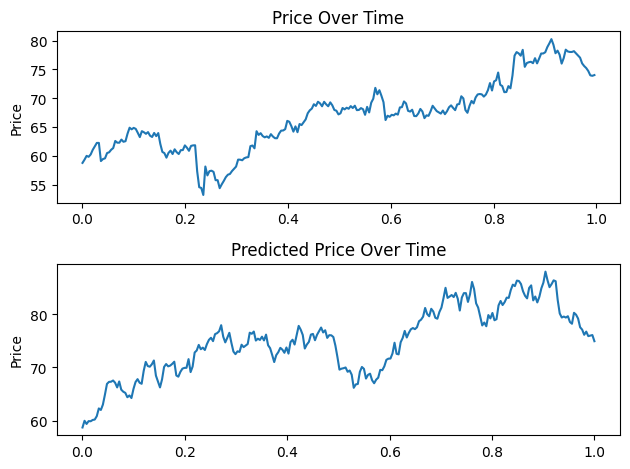

In [85]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(t[0:n_steps], df['price'])
axes[0].set_title('Price Over Time')
axes[0].set_ylabel('Price')

axes[1].plot(t, St.T)
axes[1].set_title('Predicted Price Over Time')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Plotting n Paths Results

In [ ]:
n_paths = 100
dt = 1
t, St = model.simulate(S0, T, dt, n_paths)

tt = np.full(shape=(n_paths,n_steps+1), fill_value=t).T
plt.plot(tt, St.T)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Modelling stock prices using Brownian motion\n $d (\log S_t) = \mu dt + \sigma dW_t$\n $S_0 = {0}, \mu = {1}, \sigma = {2}$".format(S0, mu, sigma)
)
plt.show()

### Summary

This stochastic model simulates the stock price for Cisco based on historical data. Most of sample paths likely match the historic data. But it cannot pridict jump like it on April 7. I may add jump-diffusion in the future. 